In [1]:
import xarray as xr
import pandas as pd
import numpy as np

In [3]:
df=xr.open_dataset('mydata.nc')
df

<xarray.Dataset>
Dimensions:    (longitude: 47, latitude: 63, expver: 2, time: 60)
Coordinates:
  * longitude  (longitude) float32 88.0 88.1 88.2 88.3 ... 92.3 92.4 92.5 92.6
  * latitude   (latitude) float32 26.56 26.46 26.36 26.26 ... 20.56 20.46 20.36
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2023-12-01
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-21 15:15:03 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
df.d2m[0].plot()

AttributeError: 'Dataset' object has no attribute 'd2m'

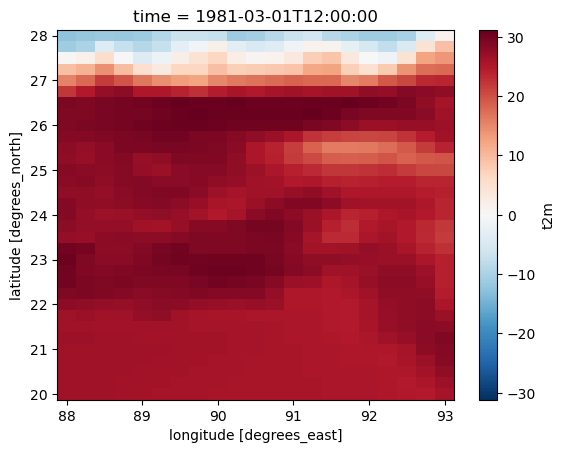

In [7]:
data=df['t2m']-273.5
data[0].plot()

In [7]:
#!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [9]:
#!pip install regionmask

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for regionmask from https://files.pythonhosted.org/packages/6b/b2/acaaa4e87fb49c67353612730c01f2278e35e4685d8cd0aa6660ce815ea5/regionmask-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/71.4 kB ? eta -:--:--
   ----------------- ---------------------- 30.7/71.4 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 41.0/71.4 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 71.4/71.4 kB 556.0 kB/s eta 0:00:00


In [15]:
#!pip install Cartopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import regionmask
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
shp=gpd.read_file('D:\Docs\DSM\8th Semester\415 DSMHP\Project\Shapefile\BGD_adm0.shp')
shp

DriverError: D:\Docs\DSM\8th Semesterč DSMHP\Project\Shapefile\BGD_adm0.shp: No such file or directory

# Shape file showing

NameError: name 'shp' is not defined

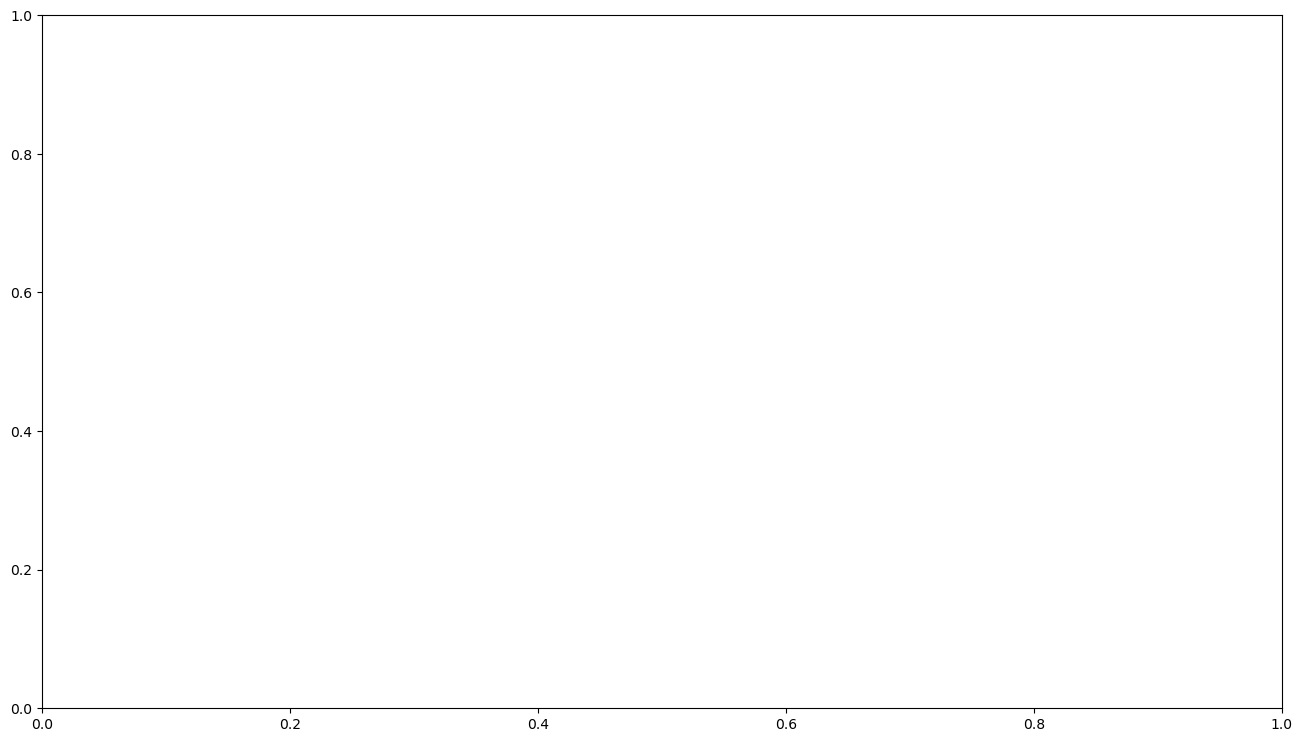

In [3]:
fig,ax=plt.subplots(figsize=(16,9))
shp.plot(ax=ax,column='NAME_ISO')


# MAsking netcedf by shapefile

In [191]:
my_list = list(shp['NAME_ISO'])
my_list_unique = set(list(shp['NAME_ISO']))
indexes = [my_list.index(x) for x in my_list_unique]

In [6]:
 ##Creating the mask for the NetCDF file


gdf_mask_poly = regionmask.Regions(name = 'NAME_ISO',
                                   numbers = indexes,
                                   names = shp.NAME_ISO[indexes], 
                                   abbrevs = shp.NAME_ISO[indexes], 
                                   outlines = list(shp.geometry.values[i] for i in range(0,shp.shape[0])))
gdf_mask_poly

 ##Applying the mask to the NetCDF file
    #mask = gdf_mask_poly.mask(ds_temp2, lat_name='lat', lon_name='lon')


NameError: name 'indexes' is not defined

In [193]:
mask=gdf_mask_poly.mask(df.isel(time=0),lat_name='latitude',lon_name='longitude')


In [194]:
#mask.to_netcdf('mask.nc')

In [195]:
mask_shp=df.where(mask==0)


In [4]:
import matplotlib.pyplot as plt

NameError: name 'mask_shp' is not defined

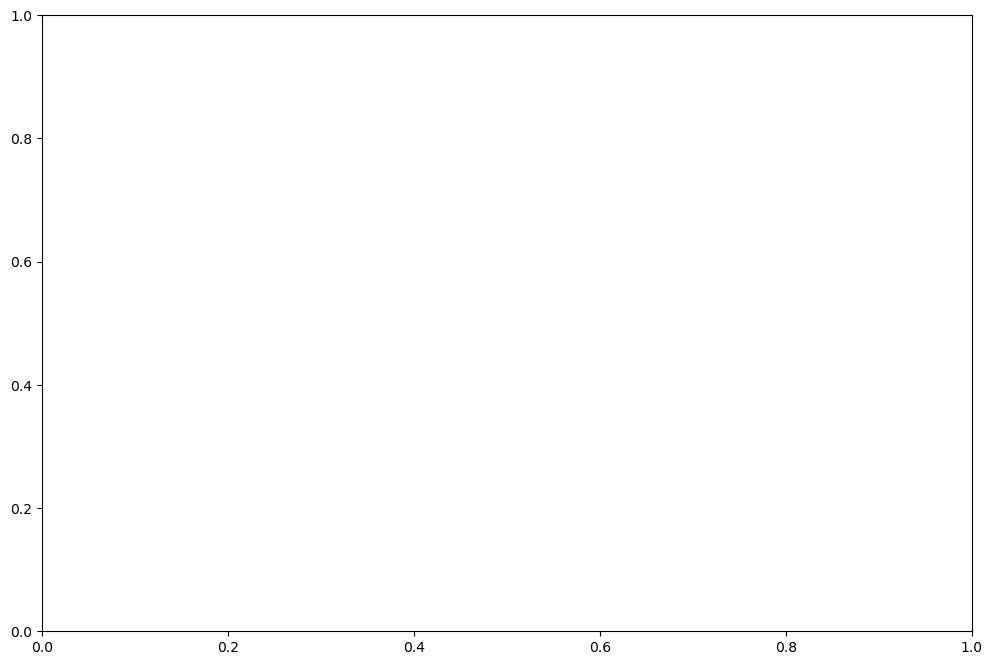

In [5]:
plt.figure(figsize=(12,8))
ax = plt.axes()

# Assuming 'variable_name' is the variable you want to plot from the dataset
mask_shp['t2m'].isel(time=0).plot(ax=ax)

# Assuming 'shp' is a GeoDataFrame
shp.plot(ax=ax, alpha=0.8, facecolor='none')

plt.show()